In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

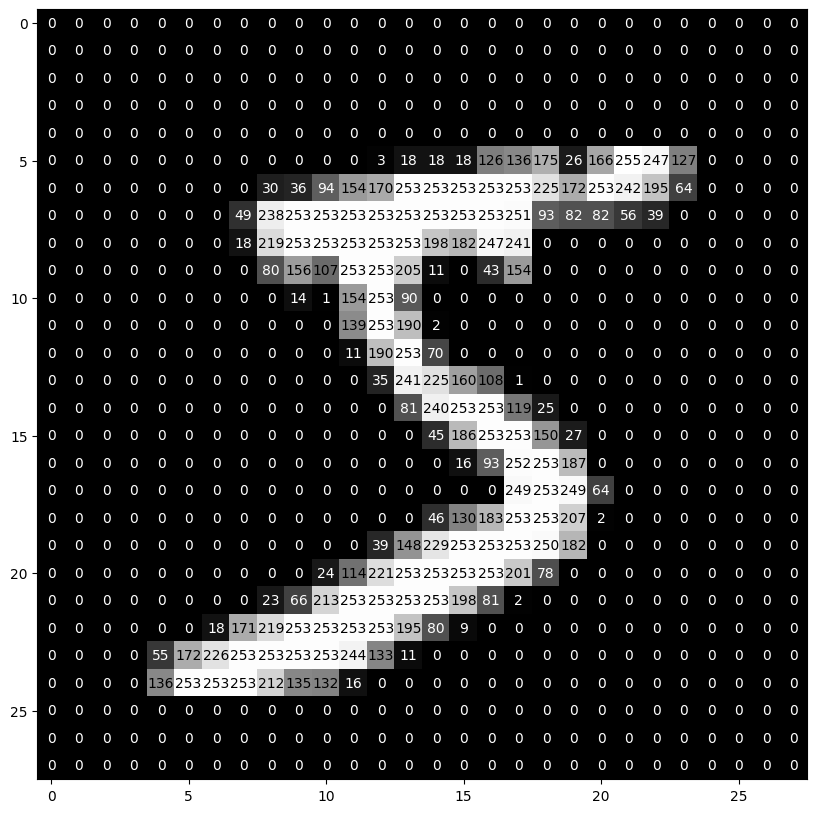

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)

Text(0.5, 1.0, '[5]')

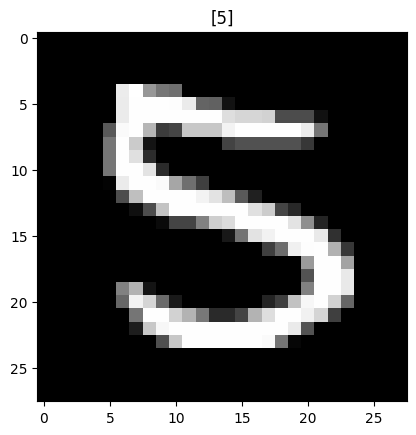

In [4]:
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])

In [5]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [6]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [7]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [8]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10


2023-04-20 09:44:42.488267: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 3s 2ms/step - loss: 0.2336 - accuracy: 0.9307 - val_loss: 0.1261 - val_accuracy: 0.9620
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0937 - accuracy: 0.9719 - val_loss: 0.0970 - val_accuracy: 0.9701
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0838 - val_accuracy: 0.9755
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0995 - val_accuracy: 0.9708
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0846 - val_accuracy: 0.9759
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0861 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0878 - val_accuracy: 0.9757
Epo

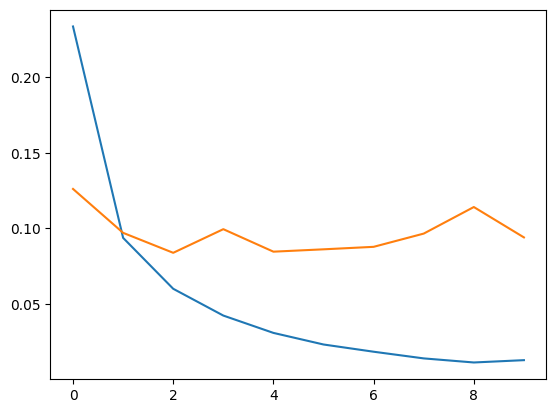

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

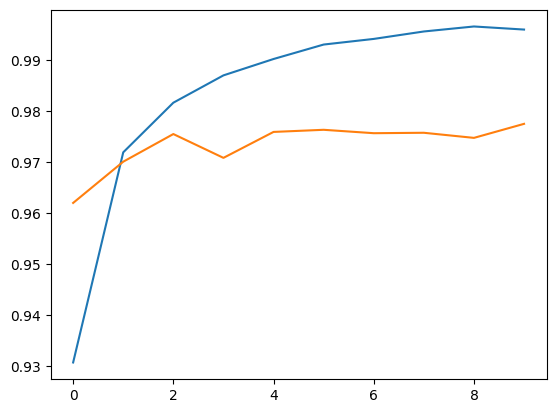

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 84ms/step


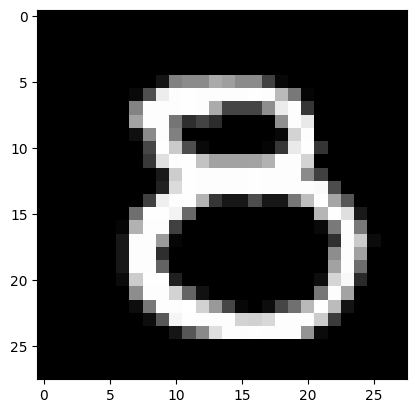

In [12]:
import keras.utils as image

img = image.load_img(path="8.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [ ]:
prediction

8

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_pred,y_test)

313/313 [==============================] - 0s 765us/step


0.978

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 968,    0,    5,    0,    1,    2,    3,    0,    1,    1],
       [   1, 1130,    0,    0,    0,    0,    2,    2,    0,    2],
       [   0,    1, 1003,    1,    1,    0,    0,    4,    4,    0],
       [   1,    0,    2,  990,    1,    6,    0,    3,   12,    1],
       [   1,    0,    4,    0,  958,    0,    1,    0,    3,    4],
       [   2,    0,    0,    4,    1,  875,    3,    0,    6,    5],
       [   4,    1,    3,    0,    5,    3,  947,    0,    3,    1],
       [   1,    0,   12,    5,    1,    0,    2, 1015,    5,    7],
       [   2,    3,    3,    1,    1,    2,    0,    1,  935,    0],
       [   0,    0,    0,    9,   13,    4,    0,    3,    5,  988]],
      dtype=int64)

In [14]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       986
           1       0.99      0.99      0.99      1134
           2       0.98      0.98      0.98      1033
           3       0.98      0.97      0.97      1022
           4       0.97      0.99      0.98       957
           5       0.98      0.97      0.98       900
           6       0.98      0.99      0.99       955
           7       0.96      0.99      0.97       990
           8       0.98      0.95      0.97       999
           9       0.97      0.96      0.96      1024

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
model.save("mnist.hdf5")